In [23]:
import mne
mne.set_log_level(verbose='WARNING')
from my_ecog_utils import read_with_annotations

In [24]:
def compare_psd_pre_post(pt_num):
    raw = read_with_annotations(pt_num)
    pre_evts, event_id = mne.events_from_annotations(raw, {'pre_shock': 1})
    pre_epochs = mne.Epochs(raw, pre_evts, event_id=event_id, tmin=0, tmax=1, baseline=(0.5,1.0))
    pre_epochs.drop_bad()
    post_evts, event_id = mne.events_from_annotations(raw, {'post_shock': 2})
    post_epochs = mne.Epochs(raw, post_evts, event_id=event_id, tmin=0, tmax=1, baseline=(0.5,1.0))
    post_epochs.drop_bad()
    pre_evoked = pre_epochs.average()
    post_evoked = post_epochs.average()

    mne.viz.plot_compare_evokeds(dict(pre_stim=pre_evoked, post_stim=post_evoked))

Patient 100


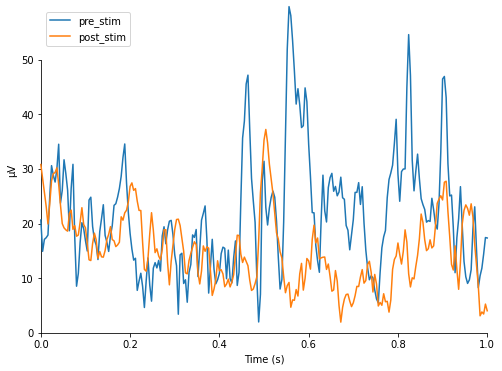

Patient 103


Patient 105


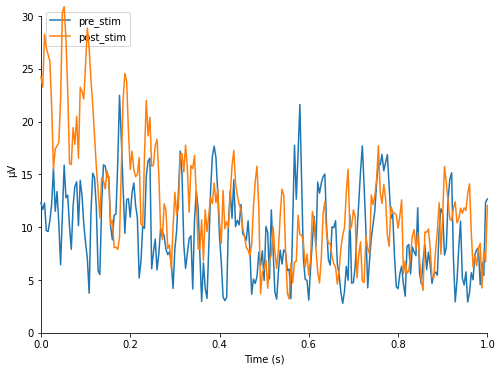

Patient 110


Patient 111


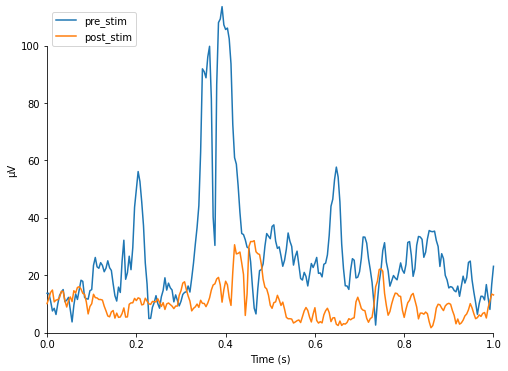

Patient 112


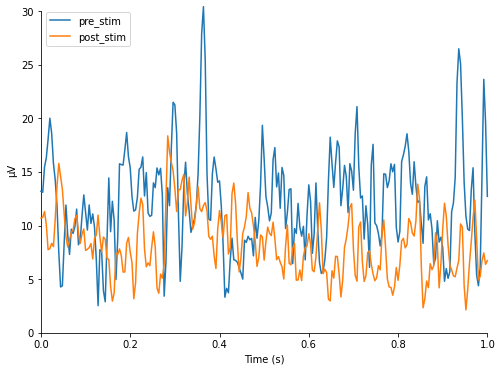

Patient 113


Patient 115


In [26]:
pts_w_any_stim = [100, 103, 105, 110, 111, 112, 113, 115]
for pt_num in pts_w_any_stim:
    print(f'Patient {pt_num}')
    compare_psd_pre_post(pt_num)